In [1]:
import numpy as np
from tardis import run_tardis
import pandas as pd
import matplotlib.pyplot as plt

/afs/mpa/data/csogeza/tardis/lib/python3.7/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
def generate_powerlaw_grid(n, rho0, v0, t0, vgrid, test = False):
    rhogrid = rho0*np.power(v0/vgrid, n)
    #data = {'index': (np.linspace(0, vgrid.shape[0]-1, vgrid.shape[0]).astype(int)),
    #       'velocity (km/s)': vgrid,
    #       'density (g/cm^3)': rhogrid}
    #df = pd.DataFrame(data)
    if test:
        return rhogrid
    else:
        with open('power-density-n'+str(n)+'-t'+str(t0)+'-rho'+str(rho0)+'_v'+str(v0)+'.dat', 'w') as f:
            f.write('%f day\n' % t0)
            f.write('# index velocity (km/s) density (g/cm^3)\n')
            for i in range (vgrid.shape[0]):
                f.write('%i\t%.3f\t%.7e\n' % (i, vgrid[i], rhogrid[i]))
     #       df.to_csv(f, header = True, index = False, sep='\t', float_format='%.5e')

In [3]:
rg = generate_powerlaw_grid(-5, 2e-14, 11500, 1, np.linspace(9000,22500,10), test = True)

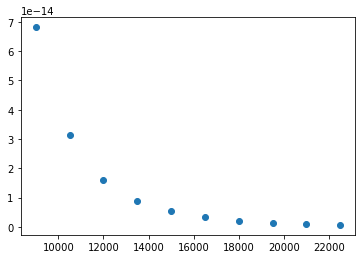

In [6]:
plt.scatter(np.linspace(9000,22500,10),rg)

In [14]:
generate_powerlaw_grid(5, 2e-14, 11500, 1, np.linspace(9000,22500,10))

In [14]:
def generate_broken_powerlaw_grid(n1, n2, v_th, rho0, v0, t0, vgrid, test = False):
    
    # Is this supposed to be continuous? I guess so...
    rhogrid = np.zeros(vgrid.shape)
    cond = (vgrid <= v_th)
    rhogrid[cond] = rho0 * np.power(v0 / vgrid[cond], n1)
    rhogrid[~cond] = rho0 * np.power(v0 / v_th, n1) * np.power(v_th / vgrid[~cond], n2)  
    
    if test:
        return rhogrid
    else:
        with open('power-density-n1_'+str(n1)+'-n2_'+str(n2)+'-t'+str(t0)+'-rho'+str(rho0)+'_v'
                  +str(v0)+'_vth'+str(v_th)+'.dat', 'w') as f:
            f.write('%f day\n' % t0)
            f.write('# index velocity (km/s) density (g/cm^3)\ n')
            for i in range (vgrid.shape[0]):
                f.write('%i\t%.3f\t%.7e\n' % (i, vgrid[i], rhogrid[i]))

In [6]:
rg = generate_broken_powerlaw_grid(5, 10, 12000, 2e-14, 11500, 1, np.linspace(9000,22500,1000), test=True)

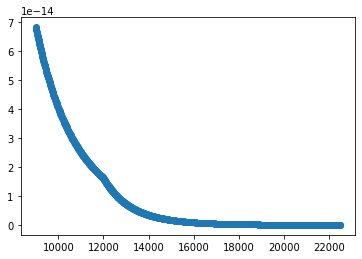

In [7]:
plt.scatter(np.linspace(9000,22500,1000),rg)

In [39]:
generate_broken_powerlaw_grid(3, 5, 12000, 2e-10, 11500, 1, np.linspace(9000,22500,15))

In [40]:
sim = run_tardis('tardis_custom_broken_pl.yml')

[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:87)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /afs/mpa/home/csogeza/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:35)
[py.warnings         ][WARNING]  /afs/mpa/data/csogeza/tardis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:110)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:187)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data (base.py:193)
[tardis.simulation.base][INFO   ]  Starting iteration 1/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 7.002

[tardis.simulation.base][INFO   ]  t_inner 12509.040 K -- next t_inner 9810.612 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 11/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 6.32245e+42 erg / s Luminosity absorbed = 3.57677e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      12636.173395  10923.334729  0.528375  0.368029
	5      13239.418334  12336.516803  0.106795  0.055819

 (base.py:433)
[tardis.simulation.base][INFO   ]  t_inner 9810.612 K -- next t_inner 12698.666 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 12/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.82367e+43 erg / s Luminosity absorbed = 9.63663e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulati

In [8]:
def plot_spectrum(sim):
    spectrum = sim.runner.spectrum
    spectrum_virtual = sim.runner.spectrum_virtual
    spectrum_integrated = sim.runner.spectrum_integrated

    plt.plot(spectrum.wavelength, spectrum.luminosity_density_lambda, label='normal packets')
    plt.plot(spectrum.wavelength, spectrum_virtual.luminosity_density_lambda, label='virtual packets')
    plt.plot(spectrum.wavelength, spectrum_integrated.luminosity_density_lambda, label='formal integral')

    plt.xlabel('Wavelength [$\AA$]')
    plt.ylabel('Luminosity [erg/s/$\AA$]')
    plt.legend()
    plt.xlim(3000,9000)
    plt.ylim(-0.5e39,6e39)
    
def get_spectra(sim):
    spectrum = sim.runner.spectrum
    spectrum_virtual = sim.runner.spectrum_virtual
    spectrum_integrated = sim.runner.spectrum_integrated
    
    return spectrum, spectrum_virtual, spectrum_integrated

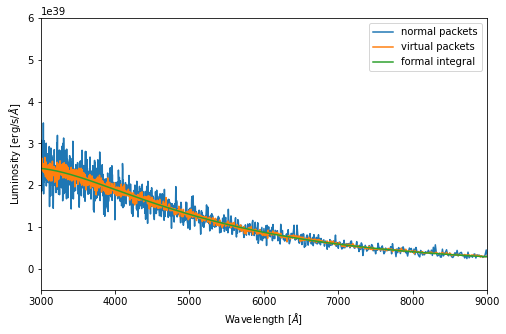

In [35]:
plt.figure(figsize=(8,5))  # n1 = 5 n2 = 10 rho = 2e-14
plot_spectrum(sim)

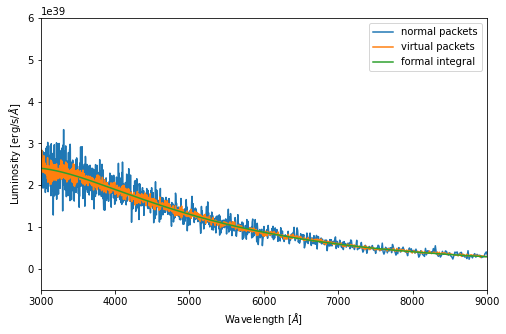

In [38]:
plt.figure(figsize=(8,5))  # n1 = 5 n2 = 5 rho = 2e-14
plot_spectrum(sim)

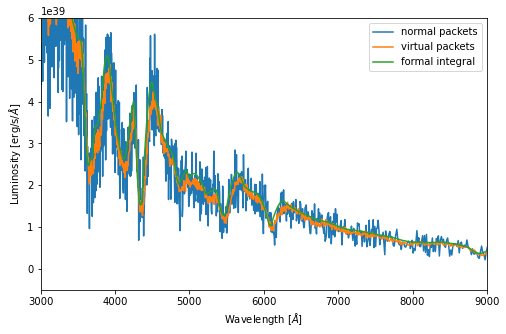

In [41]:
plt.figure(figsize=(8,5)) # n1 = 3 n2 = 5 rho = 2e-10
plot_spectrum(sim)

# -------------------------------------------------------------------------

In [9]:
def get_v_ph(v0, v_th, rho0, mu_e, n1, n2, sig_e):
    return np.power(2/3 * (mu_e * (n2 - 1)) / (rho0 * v0**n1 * v_th**(n2-n1) * sig_e * t) -\
                    v_th**(1 - n2) * (n2 - n1) / (n1 - 1), 1 / (1 - n2))

In [17]:
def get_rhoV0_factor(v_ph, v_th, mu_e, n1, n2, sig_e, t):  # this calculates the rho0 * v0^n1 factor based on v_ph
    numer = 2/3 * (mu_e * (n2 - 1)) / (v_th**(n2 - n1) * sig_e * (t * 86400)) # time dependence!!!
    denom = v_ph**(1 - n2) + v_th**(1 - n2) * (n2 - n1) / (n1 - 1)
    return numer / denom

In [20]:
def generate_broken_powerlaw_grid_vph(n1, n2, v_th, v_ph, t0, mu_e, vgrid, sig_e, test = False):
    
    rhogrid = np.zeros(vgrid.shape)
    cond = (vgrid <= v_th)
    #v_ph = get_v_ph(v0, v_th, rho0, mu_e, n1, n2, sig_e)
    rhoV0 = get_rhoV0_factor(v_ph, v_th, mu_e, n1, n2, sig_e, t0)
    rhogrid[cond] = rhoV0 * np.power(1 / vgrid[cond], n1)
    rhogrid[~cond] = rhoV0 * np.power(1 / v_th, n1) * np.power(v_th / vgrid[~cond], n2)  
    
    if test:
        return rhogrid
    else:
        with open('power-density-n1_'+str(n1)+'-n2_'+str(n2)+'-t'+str(t0)+'-vph_'+str(v_ph)+
                  '-vth_'+str(v_th)+'-mu_e_'+str(mu_e)+'.dat', 'w') as f:
            f.write('%f day\n' % t0)
            f.write('# index velocity (km/s) density (g/cm^3)\ n')
            for i in range (vgrid.shape[0]):
                f.write('%i\t%.3f\t%.7e\n' % (i, vgrid[i], rhogrid[i]))

In [31]:
rgo = generate_broken_powerlaw_grid_vph(5, 13, 15000, 20000, 1.5, 9.1e-31, np.linspace(9000,22500,1000),
                                        1e-24, test = True)

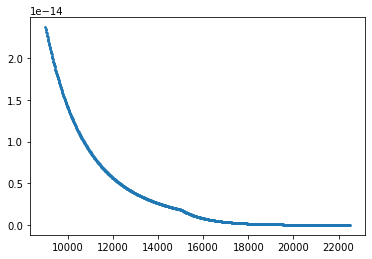

In [32]:
plt.scatter(np.linspace(9000,22500,1000),rgo, s=3)